In [ ]:
import pandas as pd
from google.colab import drive, files
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/collab data/bestsellers.csv')

Mounted at /content/drive


In [ ]:
df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [ ]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [ ]:
df = df.drop(['Name','Author','Year'], axis=1)

In [ ]:
df.head(10)

,User Rating,Reviews,Price,Genre
0,4.7,17350,8,Non Fiction
1,4.6,2052,22,Fiction
2,4.7,18979,15,Non Fiction
3,4.7,21424,6,Fiction
4,4.8,7665,12,Non Fiction
5,4.4,12643,11,Fiction
6,4.7,19735,30,Fiction
7,4.7,19699,15,Fiction
8,4.7,5983,3,Non Fiction
9,4.6,23848,8,Fiction


In [ ]:
df.shape

(550, 4)

In [ ]:
df.describe()

,User Rating,Reviews,Price
count,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000
std,0.226980,11731.132017,10.842262
min,3.300000,37.000000,0.000000
25%,4.500000,4058.000000,7.000000
50%,4.700000,8580.000000,11.000000
75%,4.800000,17253.250000,16.000000
max,4.900000,87841.000000,105.000000


In [ ]:
X = df.iloc[:, [0,2]].values

In [ ]:
X

array([[ 4.7,  8. ],
       [ 4.6, 22. ],
       [ 4.7, 15. ],
       ...,
       [ 4.7,  8. ],
       [ 4.7,  8. ],
       [ 4.7,  8. ]])

In [ ]:
# KMeans class from the sklearn library.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10, random_state=0 )

In [ ]:
kmeans.n_clusters

5

In [ ]:
y_kmeans = kmeans.fit_predict(X)

In [ ]:
type(y_kmeans)

numpy.ndarray

In [ ]:
y_kmeans

array([2, 4, 1, 2, 1, 1, 4, 1, 2, 2, 2, 2, 4, 2, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 2, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 3, 3, 2, 1, 4, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       4, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 4,
       1, 1, 4, 4, 2, 0, 2, 2, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 4, 1, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 4, 2, 1, 1, 2, 2,
       1, 2, 1, 2, 2, 1, 4, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 4, 4, 2, 2,
       2, 4, 4, 4, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 2, 2,
       1, 1, 1, 1, 4, 4, 2, 2, 2, 2, 1, 1, 2, 4, 1,

In [ ]:
df['cluster'] = y_kmeans
df.head()

,User Rating,Reviews,Price,Genre,cluster
0,4.7,17350,8,Non Fiction,2
1,4.6,2052,22,Fiction,4
2,4.7,18979,15,Non Fiction,1
3,4.7,21424,6,Fiction,2
4,4.8,7665,12,Non Fiction,1


In [ ]:
print(y_kmeans.shape)
print(y_kmeans.dtype)

(550,)
int32


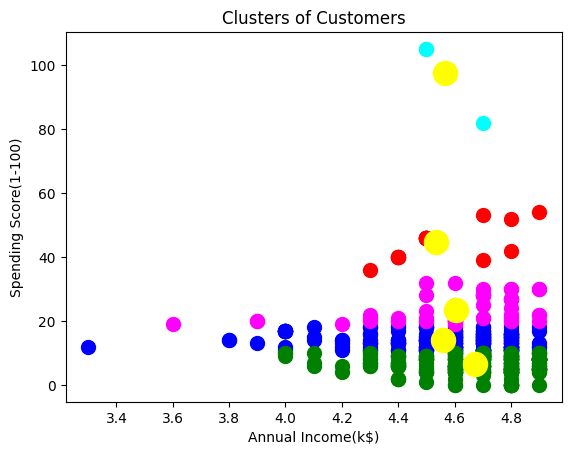

In [ ]:
#6 Visualising the clusters
import matplotlib.pyplot as plt
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
#Plot the centroid. This time we're going to use the cluster centres
#attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()